## Exploratory Data Analysis (EDA)

### Business Context:
This dataset likely pertains to health insurance, specifically modeling or predicting insurance charges. The goal of such a predictive model would be to estimate the insurance cost (charges) for individuals based on their demographic and health-related attributes. This could be useful for:

- **Insurance Premium Calculation:** Insurance companies could use this model to determine premiums for customers by predicting potential healthcare costs.
- **Risk Assessment:** Identifying high-risk individuals (e.g., smokers with high BMI) who might incur higher medical expenses.
- **Customer Segmentation:** Segmenting customers based on age, region, and lifestyle factors to tailor insurance products.
- **Policy Design:** Designing customized health insurance plans by understanding how different factors affect medical costs.
- **Marketing Strategy:** Targeted marketing for different customer groups, e.g., promoting health programs to high-BMI or smoker groups to reduce future costs.


### Packages and Libraries

In [ ]:
import pandas as pd 
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA


from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#https://medium.com/@prosun.csedu/polynomialfeatures-is-a-preprocessing-tool-provided-by-the-scikit-learn-library-in-python-that-is-84118adea049

### Read data

In [3]:
def read_file(file_name : str )  -> pd.DataFrame:
    """
    summary
    """
    try:
        dir_folder = pathlib.Path().cwd().parent
        print(dir_folder)
        file_path  = dir_folder / "data" 
        print(file_path)
        df = pd.read_csv(os.path.join(file_path/file_name))
        return df
    except FileNotFoundError:
        print(f"Error: The file at '{file_name}' was not found.")
        raise
    except Exception as e:
         print(f"An error occurred: {e}")
        
        
        
df = read_file('insurance.csv')      
  
df.head()   





c:\Abdelouaheb\perso\Data_science_2024_projects\2025\machine_learning_project_usa_insurance_data_set
c:\Abdelouaheb\perso\Data_science_2024_projects\2025\machine_learning_project_usa_insurance_data_set\data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data structure

In [3]:
def data_diagnostic(df):
        print("#"*50)
        print(df.info())
        print("#"*50)
        print("The number of total rows  {x: .0f} ".format(x=df.shape[0]))
        print("The number of total variables {x: .0f} ".format(x=df.shape[1]))
        print("The variables names {x:} ".format(x=list(df.columns.values)))

        column_headers =list(df.columns.values)
        qualitative_columns = [col for col in column_headers if df[col].dtype=="object"]
        quantitative_columns = [col for col in column_headers if df[col].dtype in ['int64', 'float64']]

        print("The qualitative variables {x:} ".format(x=qualitative_columns))
        print("The quantitative variables {x:} ".format(x=quantitative_columns))
        print("#"*50)
        print("Total number missing value {x:} ".format(x=df.isnull().sum()))

In [4]:
data_diagnostic(df)

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
##################################################
The number of total rows   1338 
The number of total variables  7 
The variables names ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] 
The qualitative variables ['sex', 'smoker', 'region'] 
The quantitative variables ['age', 'bmi', 'children', 'charges'] 
##################################################
Total number missing value age         0
sex    

### Analyse univary

#### Numerical varaiables

In [5]:
def numeric_analysis(df):
        
    
        return print(df.describe().T)

In [6]:
numeric_analysis(df)


           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801  


#### Numerical varaiables visualization

In [7]:
def univariate_analysis(df, base_folder="univariate_analysis"):
        # Ensure the base folder exists
        if not os.path.exists(base_folder):
            os.makedirs(base_folder)
        
        # Select numeric columns
        numeric_cols = df.select_dtypes(include=['number']).columns
        
        for col in numeric_cols:
            # Create a folder for the analysis
            col_folder = os.path.join(base_folder, col)
            if not os.path.exists(col_folder):
                os.makedirs(col_folder)
            
            print(f"\nPerforming Univariate Analysis for: {col}")
            
            # Create a single figure with 2x2 layout
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
            
            # Bar Chart
            sns.barplot(
                x=df[col].value_counts().index, 
                y=df[col].value_counts().values, 
                palette="viridis", 
                ax=axes[0, 0]
            )
            axes[0, 0].set_title('Bar Chart')
            axes[0, 0].set_xlabel(col)
            axes[0, 0].set_ylabel('Frequency')
            
            # Box Plot
            sns.boxplot(y=df[col], palette="viridis", ax=axes[0, 1])
            axes[0, 1].set_title('Box Plot')
            axes[0, 1].set_xlabel(col)
            
            # Density Plot
            sns.kdeplot(df[col], fill=True, color="blue", alpha=0.6, ax=axes[1, 0])
            axes[1, 0].set_title('Density Plot')
            axes[1, 0].set_xlabel(col)
            axes[1, 0].set_ylabel('Density')
            
            # Histogram
            sns.histplot(df[col], kde=False, color="green", ax=axes[1, 1])
            axes[1, 1].set_title('Histogram')
            axes[1, 1].set_xlabel(col)
            axes[1, 1].set_ylabel('Frequency')
            
            # Adjust layout
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
            
            # Save the combined plot
            combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
            plt.savefig(combined_plot_path, bbox_inches='tight')
            plt.close()
            
            print(f"Combined plots for {col} saved in: {combined_plot_path}")

In [8]:
univariate_analysis(df, base_folder="univariate_analysis")


Performing Univariate Analysis for: age
Combined plots for age saved in: univariate_analysis\age\age_univariate_analysis.png

Performing Univariate Analysis for: bmi
Combined plots for bmi saved in: univariate_analysis\bmi\bmi_univariate_analysis.png

Performing Univariate Analysis for: children
Combined plots for children saved in: univariate_analysis\children\children_univariate_analysis.png

Performing Univariate Analysis for: charges
Combined plots for charges saved in: univariate_analysis\charges\charges_univariate_analysis.png


#### Categorical varaiables

In [9]:
def categorical_analysis(df):
    return print(df.select_dtypes(include='object').describe().T)

In [10]:
categorical_analysis(df)

       count unique        top  freq
sex     1338      2       male   676
smoker  1338      2         no  1064
region  1338      4  southeast   364


#### Categorical varaiables visualization

In [11]:
def univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical"):
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        # Create a folder for the analysis
        col_folder = os.path.join(base_folder, col)
        if not os.path.exists(col_folder):
            os.makedirs(col_folder)
        
        print(f"\nPerforming Univariate Analysis for: {col}")
        
        # Create a figure with 1x2 layout
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
        
        # Bar Plot
        sns.countplot(x=df[col], palette="viridis", ax=axes[0])
        axes[0].set_title('Count Plot')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Pie Chart
        df[col].value_counts().plot.pie(
            autopct='%1.1f%%', 
            colors=sns.color_palette("viridis", len(df[col].unique())), 
            ax=axes[1], 
            startangle=90
        )
        axes[1].set_title('Pie Chart')
        axes[1].set_ylabel('')  # Remove y-label for better visualization
        
        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
        
        # Save the combined plot
        combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
        plt.savefig(combined_plot_path, bbox_inches='tight')
        plt.close()
        
        print(f"Combined plots for {col} saved in: {combined_plot_path}")


In [12]:
univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical")


Performing Univariate Analysis for: sex
Combined plots for sex saved in: univariate_analysis_categorical\sex\sex_univariate_analysis.png

Performing Univariate Analysis for: smoker
Combined plots for smoker saved in: univariate_analysis_categorical\smoker\smoker_univariate_analysis.png

Performing Univariate Analysis for: region
Combined plots for region saved in: univariate_analysis_categorical\region\region_univariate_analysis.png


### Multyvarie Analysis

In [13]:
target = 'charges'

In [14]:
def multivariate_analysis(target, df, base_folder="multivariate_analysis"):
    """
    Performs multivariate analysis with respect to the target variable.
    Outputs:
        - Categorical vs Target: Histograms with Density Curves separately by modality.
        - Numeric vs Target: Scatter plots with Density Curves separately by modality.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the analysis images.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # --- Categorical vs Target ---
    cat_vs_target_folder = os.path.join(base_folder, "categorical_vs_target")
    if not os.path.exists(cat_vs_target_folder):
        os.makedirs(cat_vs_target_folder)
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        if col != target:  # Skip the target itself
            print(f"\nAnalyzing Categorical vs Target: {target} vs {col}")
            
            # Create a grid of histograms by modality of the categorical variable
            modalities = df[col].unique()
            n_modalities = len(modalities)
            fig, axes = plt.subplots(1, n_modalities, figsize=(6 * n_modalities, 6), sharey=True)
            
            if n_modalities == 1:
                axes = [axes]  # To handle single modality case
            
            for i, modality in enumerate(modalities):
                subset = df[df[col] == modality]
                sns.histplot(
                    subset[target], kde=True, ax=axes[i], alpha=0.6, color='skyblue'
                )
                axes[i].set_title(f'{col} = {modality}')
                axes[i].set_xlabel(target)
                axes[i].set_ylabel('Frequency')
            
            plt.suptitle(f'{target} Distribution by {col} (Separate by Modality)', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for main title
            
            # Save plot
            plot_path = os.path.join(cat_vs_target_folder, f"{target}_vs_{col}.png")
            plt.savefig(plot_path, bbox_inches='tight')
            plt.close()
            
            print(f"Categorical vs Target (Histograms) saved in: {plot_path}")
    
    # --- Numeric vs Target ---
    num_vs_target_folder = os.path.join(base_folder, "numeric_vs_target")
    if not os.path.exists(num_vs_target_folder):
        os.makedirs(num_vs_target_folder)
    
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        if col != target:  # Skip the target itself
            print(f"\nAnalyzing Numeric vs Target: {target} vs {col}")
            
            # Create a grid of scatter plots by modality of the target variable
            modalities = df[target].unique()
            n_modalities = len(modalities)
            fig, axes = plt.subplots(1, n_modalities, figsize=(6 * n_modalities, 6), sharey=True)
            
            if n_modalities == 1:
                axes = [axes]  # To handle single modality case
            
            for i, modality in enumerate(modalities):
                subset = df[df[target] == modality]
                sns.scatterplot(
                    x=target, y=col, data=subset, ax=axes[i], alpha=0.6, color='purple'
                )
                sns.kdeplot(
                    data=subset, x=target, y=col, ax=axes[i], color="red", levels=5, linewidths=1
                )
                axes[i].set_title(f'{target} = {modality}')
                axes[i].set_xlabel(target)
                axes[i].set_ylabel(col)
            
            plt.suptitle(f'{target} vs {col} (Scatter + Density by Modality)', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for main title
            
            # Save plot
            plot_path = os.path.join(num_vs_target_folder, f"{target}_vs_{col}.png")
            plt.savefig(plot_path, bbox_inches='tight')
            plt.close()
            
            print(f"Numeric vs Target (Scatter + Density) saved in: {plot_path}")


In [ ]:
multivariate_analysis(target,df,base_folder="multivariate_analysis")

### Multyvarie Analysis exp

### 3. Distribution Analysis:
- Both panels show a **right-skewed distribution** (long tail to the right), indicating that most people have lower charges, with fewer people having very high charges.  
- The **peak (mode)** is in the lower `charges` range for both sexes, suggesting most people fall within this category.  

### 4. Density Curves:
- The **blue density curve** overlaid on the histograms provides a smoother view of the distribution.  
- It confirms the right-skewed pattern and shows that the distribution tails off as `charges` increase.  

### 5. Comparative Observations:
- The overall shape of the distributions for both sexes is quite similar, but:  
  - **Male (Right Panel):** Appears to have a slightly wider spread, with more instances of higher `charges` compared to females.  
  - **Female (Left Panel):** Has a sharper drop-off after the peak, indicating fewer high `charges` occurrences.  

### 6. Key Insights:
- Both males and females are most likely to have lower charges, but males have a slightly higher probability of incurring larger charges.  
- The tails in both distributions suggest the presence of outliers or a minority with significantly higher charges.  

### Multyvarie Analysis advanced

In [16]:
def scatter_plot_combinations(target, df, base_folder="scatter_combinations"):
    """
    Generates scatter plots for all possible combinations between the target variable,
    one categorical variable, and one numerical variable.
    Outputs:
        - Scatter plots showing the relationship between target and numerical variable,
          colored by the categories of the categorical variable.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the scatter plots.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical and numeric columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Iterate through all combinations of categorical and numerical variables
    for cat_col in categorical_cols:
        if cat_col != target:  # Skip the target itself
            for num_col in numeric_cols:
                if num_col != target:  # Skip the target itself
                    print(f"\nCreating Scatter Plot: Target={target}, Categorical={cat_col}, Numerical={num_col}")
                    
                    # Plot
                    plt.figure(figsize=(10, 6))
                    sns.scatterplot(
                        x=num_col, 
                        y=target, 
                        hue=cat_col, 
                        data=df, 
                        palette="viridis", 
                        alpha=0.6
                    )
                    plt.title(f'{target} vs {num_col} by {cat_col}')
                    plt.xlabel(num_col)
                    plt.ylabel(target)
                    plt.legend(title=cat_col)
                    
                    # Save plot
                    plot_folder = os.path.join(base_folder, f"{target}_vs_{num_col}_by_{cat_col}")
                    if not os.path.exists(plot_folder):
                        os.makedirs(plot_folder)
                    plot_path = os.path.join(plot_folder, f"{target}_vs_{num_col}_by_{cat_col}.png")
                    plt.savefig(plot_path, bbox_inches='tight')
                    plt.close()
                    
                    print(f"Scatter Plot saved in: {plot_path}")


In [17]:
scatter_plot_combinations(target, df, base_folder="scatter_combinations")


Creating Scatter Plot: Target=charges, Categorical=sex, Numerical=age
Scatter Plot saved in: scatter_combinations\charges_vs_age_by_sex\charges_vs_age_by_sex.png

Creating Scatter Plot: Target=charges, Categorical=sex, Numerical=bmi
Scatter Plot saved in: scatter_combinations\charges_vs_bmi_by_sex\charges_vs_bmi_by_sex.png

Creating Scatter Plot: Target=charges, Categorical=sex, Numerical=children
Scatter Plot saved in: scatter_combinations\charges_vs_children_by_sex\charges_vs_children_by_sex.png

Creating Scatter Plot: Target=charges, Categorical=smoker, Numerical=age
Scatter Plot saved in: scatter_combinations\charges_vs_age_by_smoker\charges_vs_age_by_smoker.png

Creating Scatter Plot: Target=charges, Categorical=smoker, Numerical=bmi
Scatter Plot saved in: scatter_combinations\charges_vs_bmi_by_smoker\charges_vs_bmi_by_smoker.png

Creating Scatter Plot: Target=charges, Categorical=smoker, Numerical=children
Scatter Plot saved in: scatter_combinations\charges_vs_children_by_smoker

#### Correlation matrix

In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

def correlation_and_significance(df, base_folder="correlation_analysis"):
    """
    Generates a correlation matrix heatmap with significance markers.
    Outputs:
        - Correlation Matrix with significance points (red = not significant, green = significant)
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        base_folder (str): Directory to save the analysis images.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['number'])
    cols = numeric_df.columns
    
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Initialize p-value matrix
    p_values = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    
    # Calculate p-values for each pair of variables
    for row in cols:
        for col in cols:
            if row != col:
                _, p_value = pearsonr(numeric_df[row], numeric_df[col])
                p_values.loc[row, col] = p_value
    
    # --- Plot Correlation Matrix with Significance ---
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    # Add significance markers
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:  # Skip diagonal
                p_val = p_values.iloc[i, j]
                x = j + 0.5
                y = i + 0.5
                
                # Significant if p-value < 0.05
                if p_val < 0.05:
                    plt.plot(x, y, 'o', color='green')  # Green for significant
                else:
                    plt.plot(x, y, 'o', color='red')    # Red for not significant
    
    plt.title('Correlation Matrix with Significance (Numerical Variables)', fontsize=18)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Save Correlation Matrix with Significance
    corr_plot_path = os.path.join(base_folder, "correlation_matrix_significance.png")
    plt.savefig(corr_plot_path, bbox_inches='tight')
    plt.close()
    
    print(f"Correlation matrix with significance saved in: {corr_plot_path}")


In [19]:
# Assuming df is your DataFrame
correlation_and_significance(df=df)

Correlation matrix with significance saved in: correlation_analysis\correlation_matrix_significance.png


### Data Cleaning

#### Handling missing values

In [20]:
def handle_missing_values(df, strategy='default', custom_value=None):
    """
    Handles missing values for any type of variable in a DataFrame.
    Outputs:
        - DataFrame with imputed missing values.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to handle missing values for.
        strategy (str): Imputation strategy. Options:
            - 'default': Mean for numerical, Mode for categorical.
            - 'mean': Impute numerical with mean.
            - 'median': Impute numerical with median.
            - 'mode': Impute categorical/numerical with mode.
            - 'ffill': Forward fill for categorical.
            - 'bfill': Backward fill for categorical.
            - 'custom': Fill with a specified custom value (provide custom_value).
        custom_value: A specific value to fill in missing values if strategy='custom'.
        
    Returns:
        pd.DataFrame: DataFrame with imputed missing values.
    """
    df_imputed = df.copy()  # Copy the DataFrame to avoid modifying the original
    
    # Handling Numerical Variables
    numeric_cols = df_imputed.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if df_imputed[col].isnull().sum() > 0:  # Only handle columns with missing values
            print(f"Handling missing values for Numerical Variable: {col}")
            if strategy == 'mean' or (strategy == 'default' and df_imputed[col].dtype in ['float64', 'int64']):
                df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)
            elif strategy == 'median':
                df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
            elif strategy == 'mode':
                df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)
            elif strategy == 'custom' and custom_value is not None:
                df_imputed[col].fillna(custom_value, inplace=True)
    
    # Handling Categorical Variables
    categorical_cols = df_imputed.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if df_imputed[col].isnull().sum() > 0:  # Only handle columns with missing values
            print(f"Handling missing values for Categorical Variable: {col}")
            if strategy == 'mode' or (strategy == 'default' and df_imputed[col].dtype == 'object'):
                df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)
            elif strategy == 'ffill':
                df_imputed[col].fillna(method='ffill', inplace=True)
            elif strategy == 'bfill':
                df_imputed[col].fillna(method='bfill', inplace=True)
            elif strategy == 'custom' and custom_value is not None:
                df_imputed[col].fillna(custom_value, inplace=True)
    
    return df_imputed


#### Removing duplicates rows


In [4]:
import pandas as pd

def remove_duplicates(df, subset=None, keep='first', inplace=False):
    """
    Removes duplicate rows from the DataFrame and provides a summary of duplicates.
    
    Parameters:
        df (pd.DataFrame): The DataFrame from which to remove duplicates.
        subset (list): List of columns to consider for duplicate checking. 
                       If None, checks all columns.
        keep (str): Which duplicates to keep. Options:
            - 'first': Keep the first occurrence (default).
            - 'last': Keep the last occurrence.
            - 'none': Drop all duplicates.
        inplace (bool): If True, modifies the original DataFrame. 
                        If False, returns a new DataFrame.
        
    Returns:
        pd.DataFrame: DataFrame with duplicates removed (if inplace=False).
    """
    if keep not in ['first', 'last', 'none']:
        raise ValueError("keep must be one of 'first', 'last', or 'none'.")
    
    # Count duplicates before removal
    total_rows = len(df)
    duplicate_rows = df.duplicated(subset=subset, keep=False).sum()
    percentage_duplicates = (duplicate_rows / total_rows) * 100
    
    print(f"Total Rows: {total_rows}")
    print(f"Duplicate Rows: {duplicate_rows} ({percentage_duplicates:.2f}%)")
    
    if duplicate_rows == 0:
        print("No duplicates found. No rows removed.")
        return df if not inplace else None
    
    # Handle duplicate removal
    if keep == 'none':
        # Drop all duplicates and keep only unique rows
        duplicated_mask = df.duplicated(subset=subset, keep=False)
        result = df[~duplicated_mask]
    else:
        # Use pandas built-in drop_duplicates
        result = df.drop_duplicates(subset=subset, keep=keep)
    
    # Count duplicates after removal
    remaining_rows = len(result)
    rows_removed = total_rows - remaining_rows
    
    print(f"Rows Removed: {rows_removed}")
    print(f"Remaining Rows: {remaining_rows}")
    
    if rows_removed > 0:
        print("Duplicates successfully removed.")
    else:
        print("No duplicates were removed.")
    
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return result


In [181]:
dm=remove_duplicates(df)

Total Rows: 1338
Duplicate Rows: 2 (0.15%)
Rows Removed: 1
Remaining Rows: 1337
Duplicates successfully removed.


#### Handles outliers

In [183]:
def handle_outliers(df, numerical_columns=None, method='IQR', verbose=True):
    """
    Handles outliers in continuous numerical variables using the specified method.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        numerical_columns (list): List of numerical columns to check for outliers. If None, auto-selects all numerical columns.
        method (str): Method to handle outliers ('IQR' or 'Z-Score'). Default is 'IQR'.
        verbose (bool): If True, displays outlier statistics.
        
    Returns:
        pd.DataFrame: DataFrame with outliers handled.
    """
    # Select numerical columns if not provided
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['number']).columns
    
    # Iterate over each numerical column
    for col in numerical_columns:
        if col in df.columns:
            if method == 'IQR':
                # Calculate Q1, Q3, and IQR
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                # Count and handle outliers
                outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
                num_outliers = outliers.sum()
                
                # Option 1: Capping
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
                
                if verbose:
                    print(f"[INFO] Outliers handled in '{col}' using IQR:")
                    print(f"         - Number of Outliers: {num_outliers}")
                    print(f"         - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
            
            elif method == 'Z-Score':
                # Alternative method (if needed)
                mean = df[col].mean()
                std_dev = df[col].std()
                threshold = 3  # Standard deviation threshold
                
                # Count and handle outliers
                outliers = ((df[col] < (mean - threshold * std_dev)) | (df[col] > (mean + threshold * std_dev)))
                num_outliers = outliers.sum()
                
                # Option 1: Capping
                lower_bound = mean - threshold * std_dev
                upper_bound = mean + threshold * std_dev
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
                
                if verbose:
                    print(f"[INFO] Outliers handled in '{col}' using Z-Score:")
                    print(f"         - Number of Outliers: {num_outliers}")
                    print(f"         - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    return df

In [198]:
dc=handle_outliers(dm, numerical_columns=None, method='IQR', verbose=True)

[INFO] Outliers handled in 'age' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -9.0, Upper Bound: 87.0
[INFO] Outliers handled in 'sex' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -1.5, Upper Bound: 2.5
[INFO] Outliers handled in 'bmi' using IQR:
         - Number of Outliers: 0
         - Lower Bound: 13.674999999999994, Upper Bound: 47.31500000000001
[INFO] Outliers handled in 'children' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -3.0, Upper Bound: 5.0
[INFO] Outliers handled in 'smoker' using IQR:
         - Number of Outliers: 274
         - Lower Bound: 0.0, Upper Bound: 0.0
[INFO] Outliers handled in 'charges' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -13120.716174999998, Upper Bound: 34524.777625


C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_27852\2635347732.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound


In [185]:
dc

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Data type conversions

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [106]:
def label_encode_columns(df, columns=['sex', 'smoker', 'region'], verbose=True):
    """
    Performs Label Encoding on specified categorical columns.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to encode.
        columns (list): List of column names to be label encoded.
        verbose (bool): If True, displays the label mappings.
        
    Returns:
        pd.DataFrame: DataFrame with encoded columns.
    """
    # Loop through the specified columns and encode them
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            
            # Display label mapping
            if verbose:
                mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                print(f"\n[INFO] Label Encoding for '{col}': {mapping}")
        else:
            print(f"[WARNING] Column '{col}' not found in DataFrame.")
    
    return df



In [186]:
dc=label_encode_columns(dc, columns=['sex', 'smoker'], verbose=True)
# One-Hot Encoding for 'region'
dcc = pd.get_dummies(dc, columns=['region'], drop_first=True, dtype=int)


[INFO] Label Encoding for 'sex': {'female': 0, 'male': 1}

[INFO] Label Encoding for 'smoker': {'no': 0, 'yes': 1}


C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_27852\3442008357.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_27852\3442008357.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [187]:
dcc

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


#### feature eng

In [188]:
# 2. Interaction Features
dcc['bmi_age'] = dcc['bmi'] * dcc['age']

In [112]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

# 3. Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'bmi']])
poly_df = pd.DataFrame(poly_features, columns=['age', 'bmi', 'age^2', 'bmi^2', 'age*bmi'])
dcc = pd.concat([dcc, poly_df], axis=1)
# Remove duplicate columns (if any)
dcc = dcc.loc[:, ~dcc.columns.duplicated()]
dcc = dcc.iloc[:-1]

In [189]:
# 4. Binning
dcc['age_bin'] = pd.cut(dcc['age'], bins=[0, 20, 30, 40, 50, 100], labels=[1, 2, 3, 4, 5])
dcc['bmi_bin'] = pd.cut(dcc['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=[1, 2, 3, 4])


In [190]:
# 7. Creating New Features
dcc['bmi_category'] = pd.cut(dcc['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normal', 'overweight', 'obese'])

In [191]:
dcc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               1337 non-null   int64   
 1   sex               1337 non-null   int32   
 2   bmi               1337 non-null   float64 
 3   children          1337 non-null   int64   
 4   smoker            1337 non-null   int32   
 5   charges           1337 non-null   float64 
 6   region_northwest  1337 non-null   int32   
 7   region_southeast  1337 non-null   int32   
 8   region_southwest  1337 non-null   int32   
 9   bmi_age           1337 non-null   float64 
 10  age_bin           1337 non-null   category
 11  bmi_bin           1337 non-null   category
 12  bmi_category      1337 non-null   category
dtypes: category(3), float64(3), int32(5), int64(2)
memory usage: 93.3 KB


In [ ]:
### according to your need
# dcc=label_encode_columns(dcc, columns=['age_bin', 'bmi_bin', 'bmi_category'], verbose=True)
# dcc


[INFO] Label Encoding for 'age_bin': {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

[INFO] Label Encoding for 'bmi_bin': {1: 0, 2: 1, 3: 2, 4: 3}

[INFO] Label Encoding for 'bmi_category': {'normal': 0, 'obese': 1, 'overweight': 2, 'underweight': 3}


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_age,age^2,bmi^2,age*bmi,age_bin,bmi_bin,bmi_category
0,19.0,0.0,27.900,0.0,1.0,16884.92400,0.0,0.0,1.0,530.100,361.0,530.100,778.410000,0,2,2
1,18.0,1.0,33.770,1.0,0.0,1725.55230,0.0,1.0,0.0,607.860,324.0,607.860,1140.412900,0,3,1
2,28.0,1.0,33.000,3.0,0.0,4449.46200,0.0,1.0,0.0,924.000,784.0,924.000,1089.000000,1,3,1
3,33.0,1.0,22.705,0.0,0.0,21984.47061,1.0,0.0,0.0,749.265,1089.0,749.265,515.517025,2,1,0
4,32.0,1.0,28.880,0.0,0.0,3866.85520,1.0,0.0,0.0,924.160,1024.0,924.160,834.054400,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3.0,0.0,10600.54830,1.0,0.0,0.0,1548.500,2500.0,1548.500,959.140900,3,3,1
1334,18.0,0.0,31.920,0.0,0.0,2205.98080,0.0,0.0,0.0,574.560,324.0,574.560,1018.886400,0,3,1
1335,18.0,0.0,36.850,0.0,0.0,1629.83350,0.0,1.0,0.0,663.300,324.0,663.300,1357.922500,0,3,1
1336,21.0,0.0,25.800,0.0,0.0,2007.94500,0.0,0.0,1.0,541.800,441.0,541.800,665.640000,1,2,2


In [192]:
dcc = pd.get_dummies(dcc, columns=['age_bin', 'bmi_bin', 'bmi_category'], drop_first=True,dtype=int)
dcc

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_age,age_bin_2,age_bin_3,age_bin_4,age_bin_5,bmi_bin_2,bmi_bin_3,bmi_bin_4,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,0,27.900,0,1,16884.92400,0,0,1,530.100,0,0,0,0,0,1,0,0,1,0
1,18,1,33.770,1,0,1725.55230,0,1,0,607.860,0,0,0,0,0,0,1,0,0,1
2,28,1,33.000,3,0,4449.46200,0,1,0,924.000,1,0,0,0,0,0,1,0,0,1
3,33,1,22.705,0,0,21984.47061,1,0,0,749.265,0,1,0,0,1,0,0,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0,924.160,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0,1548.500,0,0,1,0,0,0,1,0,0,1
1334,18,0,31.920,0,0,2205.98080,0,0,0,574.560,0,0,0,0,0,0,1,0,0,1
1335,18,0,36.850,0,0,1629.83350,0,1,0,663.300,0,0,0,0,0,0,1,0,0,1
1336,21,0,25.800,0,0,2007.94500,0,0,1,541.800,1,0,0,0,0,1,0,0,1,0


In [193]:
def add_stat_columns(df, columns_to_scale):
    # Iterate over the specified list of columns
    for col in columns_to_scale:
        if col in df.columns:  # Check if column exists in the DataFrame
            mean_col = f"{col}_mean"
            sd_col = f"{col}_sd"
            min_col = f"{col}_min"
            max_col = f"{col}_max"
            
            # Add the statistical columns to the DataFrame
            df[mean_col] = df[col].mean()
            df[sd_col] = df[col].std()
            df[min_col] = df[col].min()
            df[max_col] = df[col].max()
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame.")
    
    return df

# Example usage
columns_to_scale = ["age", "bmi", "bmi_age", "age^2", "bmi^2", "age*bmi"]
# Assuming `df` is your existing DataFrame
df_with_stats = add_stat_columns(dcc, columns_to_scale)
df_with_stats

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_age,...,age_min,age_max,bmi_mean,bmi_sd,bmi_min,bmi_max,bmi_age_mean,bmi_age_sd,bmi_age_min,bmi_age_max
0,19,0,27.900,0,1,16884.92400,0,0,1,530.100,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27
1,18,1,33.770,1,0,1725.55230,0,1,0,607.860,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27
2,28,1,33.000,3,0,4449.46200,0,1,0,924.000,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27
3,33,1,22.705,0,0,21984.47061,1,0,0,749.265,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27
4,32,1,28.880,0,0,3866.85520,1,0,0,924.160,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0,1548.500,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27
1334,18,0,31.920,0,0,2205.98080,0,0,0,574.560,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27
1335,18,0,36.850,0,0,1629.83350,0,1,0,663.300,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27
1336,21,0,25.800,0,0,2007.94500,0,0,1,541.800,...,18,64,30.650247,6.059655,15.96,47.315,1211.692614,522.242927,287.28,2744.27


#### Target Variable

In [194]:
from sklearn.model_selection import train_test_split
x= dcc.drop(columns='charges')
y= dcc['charges']

#### Data split


In [195]:
x_t,x_te,y_t,y_te= train_test_split(x,y,test_size=.25,random_state=20)

#### Pipeline

In [196]:
# Specify the columns you want to scale
columns_to_scale = ["age", "bmi",  "bmi_age", "age^2", "bmi^2", "age*bmi"]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the selected columns
x_t = scaler.fit_transform(x_t)
x_te = scaler.fit_transform(x_te)
#x_t[columns_to_scale] = scaler.fit_transform(x_t[columns_to_scale])
#x_te[columns_to_scale] = scaler.fit_transform(x_te[columns_to_scale])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import time
import numpy as np

#### LinearRegression

In [197]:
# Initialize Linear Regression model
lr = LinearRegression()

# Timing the training process
training_start = time.perf_counter()
model = lr.fit(x_t, y_t)
training_end = time.perf_counter()

# Timing the prediction process
prediction_start = time.perf_counter()
y_pred_train = model.predict(x_t)
y_pred_test = model.predict(x_te)
prediction_end = time.perf_counter()

# Calculate KPIs
# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_t, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_te, y_pred_test))

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_t, y_pred_train)
mae_test = mean_absolute_error(y_te, y_pred_test)

# R-squared score
r2_train = r2_score(y_t, y_pred_train)
r2_test = r2_score(y_te, y_pred_test)

# Time metrics
train_time = training_end - training_start
prediction_time = prediction_end - prediction_start

# Output metrics
print("Linear Regression Model Performance:")
print("\nTraining Set:")
print(f"  - RMSE: {rmse_train:.4f}")
print(f"  - MAE: {mae_train:.4f}")
print(f"  - R^2 Score: {r2_train:.4f}")
print(f"  - Training Time: {train_time:.4f} seconds")

print("\nTesting Set:")
print(f"  - RMSE: {rmse_test:.4f}")
print(f"  - MAE: {mae_test:.4f}")
print(f"  - R^2 Score: {r2_test:.4f}")
print(f"  - Prediction Time: {prediction_time:.5f} seconds")

Linear Regression Model Performance:

Training Set:
  - RMSE: 5161.9430
  - MAE: 3439.2153
  - R^2 Score: 0.7475
  - Training Time: 0.0032 seconds

Testing Set:
  - RMSE: 4574.6899
  - MAE: 3029.8770
  - R^2 Score: 0.7830
  - Prediction Time: 0.00156 seconds


##### Interpreation

In [179]:
print(y_te.mean())
print(y_te.std())

13419.67896856418
11946.898565359239


1. Root Mean Squared Error (RMSE):
Definition: RMSE measures the average magnitude of the error. It gives higher weight to larger errors due to the squaring, making it sensitive to outliers.
Value: 
9208.3435
9208.3435
Interpretation:
On average, the model's predictions deviate from the actual values by about 9208 units.
If your target variable is in dollars, this means the predictions are off by around $9208 on average.
Lower RMSE indicates a better fit.
Comparison:
Compare with the standard deviation of the target variable (y_te). If RMSE is close to or larger than the standard deviation, the model isn't performing well.
Compare with the mean of the target variable:
python
Copy
Edit
print(y_te.mean())
print(y_te.std())
If the RMSE is a large percentage of the mean, the model might not be accurate enough for practical use.
Interpretation:
RMSE (41.55%) → On average, predictions deviate by 41.55% of the mean target value.
MAE (30.54%) → The average absolute error is 30.54% of the mean target value.

##### Error investigation

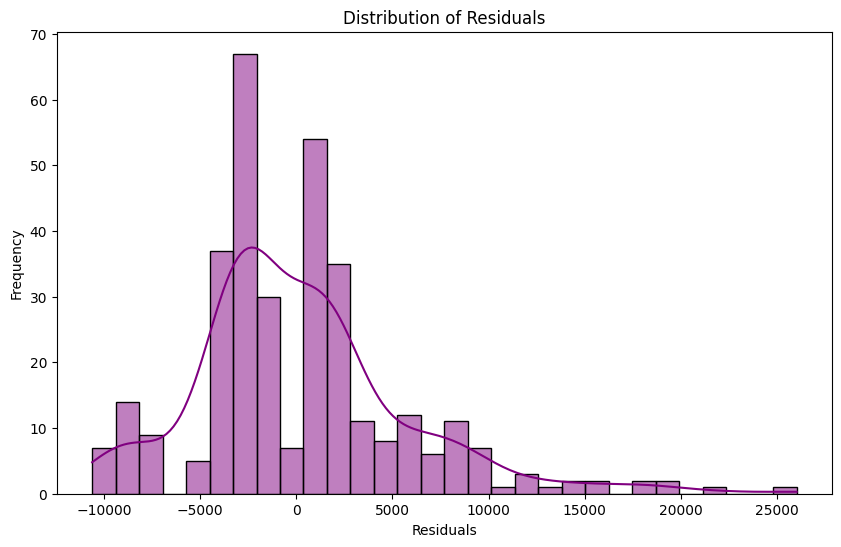

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = y_te - y_pred_test

# Plot Residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

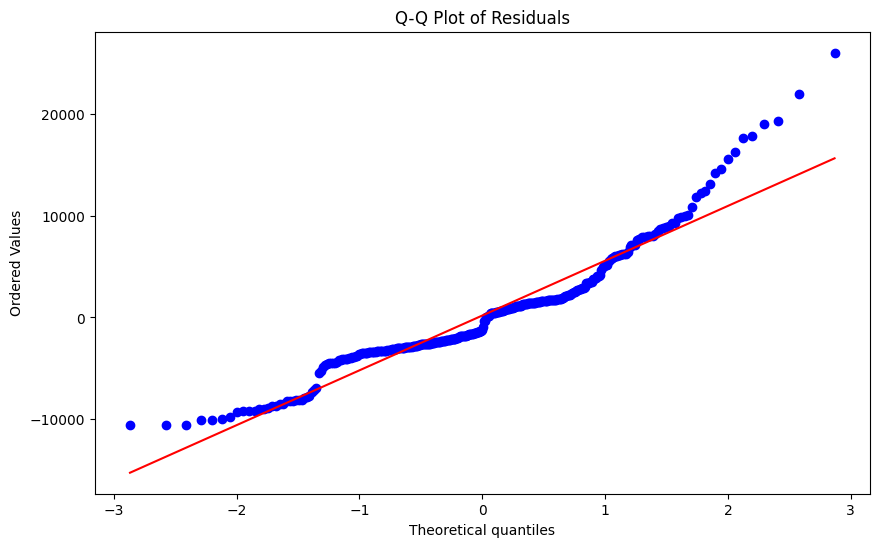

In [130]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(10,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [132]:
# Mean and Variance of Residuals
residual_mean = residuals.mean()
residual_variance = residuals.var()

print(f"Mean of Residuals: {residual_mean}")
print(f"Variance of Residuals: {residual_variance}")

Mean of Residuals: 187.5502528056962
Variance of Residuals: 31123254.682577543


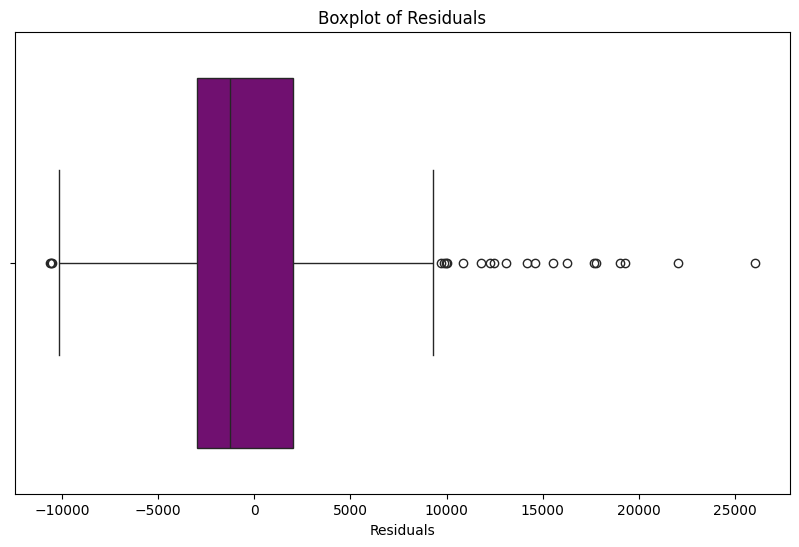

In [133]:
# Boxplot of Residuals
plt.figure(figsize=(10,6))
sns.boxplot(x=residuals, color='purple')
plt.title("Boxplot of Residuals")
plt.xlabel("Residuals")
plt.show()

In [140]:
# Mean of Residuals
residual_mean = residuals.mean()
print(f"Mean of Residuals: {residual_mean}")
# Variance of Residuals
residual_variance = residuals.var()
print(f"Variance of Residuals: {residual_variance}")


Mean of Residuals: 187.5502528056962
Variance of Residuals: 31123254.682577543


In [141]:
from scipy.stats import shapiro

# Shapiro-Wilk Test for Normality
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.923548266170011, p-value: 4.68065195053048e-12


In [142]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson Test for Autocorrelation
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")


Durbin-Watson Statistic: 2.0566478165102517


In [ ]:
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm
# Cook's Distance
influence = OLSInfluence(lr).summary_frame()
cooks_d = influence['cooks_d']
print(f"Cook's Distance: {cooks_d.max()}")

In [152]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan Test for Heteroscedasticity
_, p_val, _, _ = het_breuschpagan(residuals, sm.add_constant(y_pred_test))
print(f"Breusch-Pagan Test p-value: {p_val}")

Breusch-Pagan Test p-value: 4.0153489024730045e-07


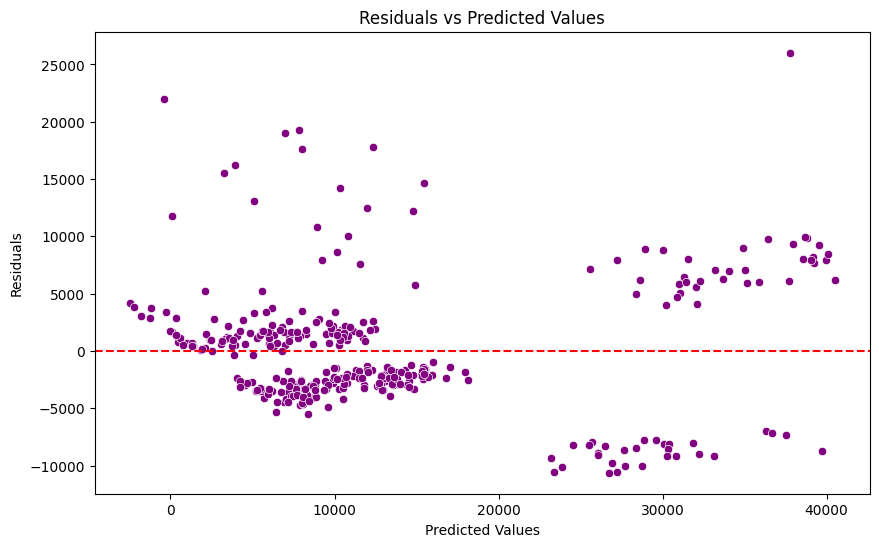

In [149]:
# Residuals vs Predicted Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_test, y=residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  # Reference line
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
!pip install statsmodels

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF Calculation for features
X = sm.add_constant(dcc[['age', 'bmi', 'children', 'charges']])  # Select features
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    feature        VIF
0     const  32.317803
1       age   1.101406
2       bmi   1.043981
3  children   1.005075
4   charges   1.135957


#### ridge and Lasso regression

In [180]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import time

# Define parameter grid for alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Ridge Regression Hyperparameter Tuning
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_start = time.perf_counter()
ridge_grid.fit(x_t, y_t)
ridge_end = time.perf_counter()

# Best Ridge Model
best_ridge = ridge_grid.best_estimator_
y_pred_ridge_train = best_ridge.predict(x_t)
y_pred_ridge_test = best_ridge.predict(x_te)

# Lasso Regression Hyperparameter Tuning
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_start = time.perf_counter()
lasso_grid.fit(x_t, y_t)
lasso_end = time.perf_counter()

# Best Lasso Model
best_lasso = lasso_grid.best_estimator_
y_pred_lasso_train = best_lasso.predict(x_t)
y_pred_lasso_test = best_lasso.predict(x_te)

# Function to Calculate and Print KPIs
def print_metrics(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name, train_time):
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    mae_train = mean_absolute_error(y_true_train, y_pred_train)
    mae_test = mean_absolute_error(y_true_test, y_pred_test)
    r2_train = r2_score(y_true_train, y_pred_train)
    r2_test = r2_score(y_true_test, y_pred_test)

    print(f"\n{model_name} Performance:")
    print("\nTraining Set:")
    print(f"  - RMSE: {rmse_train:.4f}")
    print(f"  - MAE: {mae_train:.4f}")
    print(f"  - R^2 Score: {r2_train:.4f}")
    print(f"  - Training Time: {train_time:.4f} seconds")

    print("\nTesting Set:")
    print(f"  - RMSE: {rmse_test:.4f}")
    print(f"  - MAE: {mae_test:.4f}")
    print(f"  - R^2 Score: {r2_test:.4f}")

# Print Metrics for Ridge
print_metrics(y_t, y_pred_ridge_train, y_te, y_pred_ridge_test, 
              "Ridge Regression", ridge_end - ridge_start)
print("\nBest Alpha for Ridge:", ridge_grid.best_params_['alpha'])

# Print Metrics for Lasso
print_metrics(y_t, y_pred_lasso_train, y_te, y_pred_lasso_test, 
              "Lasso Regression", lasso_end - lasso_start)
print("\nBest Alpha for Lasso:", lasso_grid.best_params_['alpha'])



Ridge Regression Performance:

Training Set:
  - RMSE: 6094.9396
  - MAE: 4337.0050
  - R^2 Score: 0.7489
  - Training Time: 0.0701 seconds

Testing Set:
  - RMSE: 5576.1227
  - MAE: 4106.5493
  - R^2 Score: 0.7815

Best Alpha for Ridge: 10

Lasso Regression Performance:

Training Set:
  - RMSE: 6110.1176
  - MAE: 4287.4696
  - R^2 Score: 0.7477
  - Training Time: 0.1097 seconds

Testing Set:
  - RMSE: 5582.8957
  - MAE: 4048.8924
  - R^2 Score: 0.7810

Best Alpha for Lasso: 100


#### DecisionTreeRegressor

In [30]:
# Initialize Decision Tree Regressor with regularization
dr = DecisionTreeRegressor(
             # Ensure reproducibility
)

# Timing the training process
training_start = time.perf_counter()
model = dr.fit(x_t, y_t)
training_end = time.perf_counter()

# Timing the prediction process
prediction_start = time.perf_counter()
y_pred_train = model.predict(x_t)
y_pred_test = model.predict(x_te)
prediction_end = time.perf_counter()

# Calculate KPIs
# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_t, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_te, y_pred_test))

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_t, y_pred_train)
mae_test = mean_absolute_error(y_te, y_pred_test)

# R-squared score
r2_train =  r2_score(y_t, y_pred_train)
r2_test = r2_score(y_te, y_pred_test)

# Time metrics
train_time = training_end - training_start
prediction_time = prediction_end - prediction_start

# Output metrics
print("Decision Tree Regressor Model Performance:")
print("\nTraining Set:")
print(f"  - RMSE: {rmse_train:.4f}")
print(f"  - MAE: {mae_train:.4f}")
print(f"  - R^2 Score: {r2_train:.4f}")
print(f"  - Training Time: {train_time:.4f} seconds")

print("\nTesting Set:")
print(f"  - RMSE: {rmse_test:.4f}")
print(f"  - MAE: {mae_test:.4f}")
print(f"  - R^2 Score: {r2_test:.4f}")
print(f"  - Prediction Time: {prediction_time:.5f} seconds")


Decision Tree Regressor Model Performance:

Training Set:
  - RMSE: 510.7002
  - MAE: 31.5794
  - R^2 Score: 0.9982
  - Training Time: 0.0064 seconds

Testing Set:
  - RMSE: 6676.0835
  - MAE: 3287.4054
  - R^2 Score: 0.6868
  - Prediction Time: 0.00186 seconds
